In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist.load_data()

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [25]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist

In [43]:
len(y_test)

10000

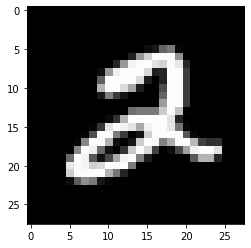

In [41]:
image = x_train[5]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [44]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [61]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [62]:
batch_size = 128
epochs = 50

In [63]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 4s 10ms/step - loss: 0.3632 - accuracy: 0.8885 - val_loss: 0.0879 - val_accuracy: 0.9760
Epoch 2/50
422/422 [==============================] - 5s 11ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.0541 - val_accuracy: 0.9857
Epoch 3/50
422/422 [==============================] - 5s 12ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0480 - val_accuracy: 0.9865
Epoch 4/50
422/422 [==============================] - 6s 14ms/step - loss: 0.0734 - accuracy: 0.9763 - val_loss: 0.0445 - val_accuracy: 0.9873
Epoch 5/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 6/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0372 - val_accuracy: 0.9897
Epoch 7/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0359 - val_accuracy: 0.9910
Ep